In [1]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170498071/170498071 [==============================] - 11s 0us/step


In [2]:
from keras.utils import to_categorical

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

model = Sequential()

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Convolutional Block (Conv-Conv-Pool-Dropout)
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Classifying
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [4]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 287s 810ms/step - loss: 1.6216 - acc: 0.4029 - val_loss: 1.2390 - val_acc: 0.5626
Epoch 2/20
352/352 [==============================] - 289s 821ms/step - loss: 1.1915 - acc: 0.5721 - val_loss: 0.9706 - val_acc: 0.6518
Epoch 3/20
352/352 [==============================] - 281s 800ms/step - loss: 1.0086 - acc: 0.6453 - val_loss: 0.8591 - val_acc: 0.6988
Epoch 4/20
352/352 [==============================] - 284s 807ms/step - loss: 0.8863 - acc: 0.6872 - val_loss: 0.8012 - val_acc: 0.7206
Epoch 5/20
352/352 [==============================] - 283s 804ms/step - loss: 0.7979 - acc: 0.7180 - val_loss: 0.7438 - val_acc: 0.7356
Epoch 6/20
352/352 [==============================] - 275s 783ms/step - loss: 0.7400 - acc: 0.7415 - val_loss: 0.6813 - val_acc: 0.7650
Epoch 7/20
352/352 [==============================] - 293s 833ms/step - loss: 0.6806 - acc: 0.7578 - val_loss: 0.6714 - val_acc: 0.7712
Epoch 8/20
352/352 [============================

In [6]:
from keras.models import load_model

model.save('CNN_CIFAR10.h5')
model = load_model('CNN_CIFAR10.h5')

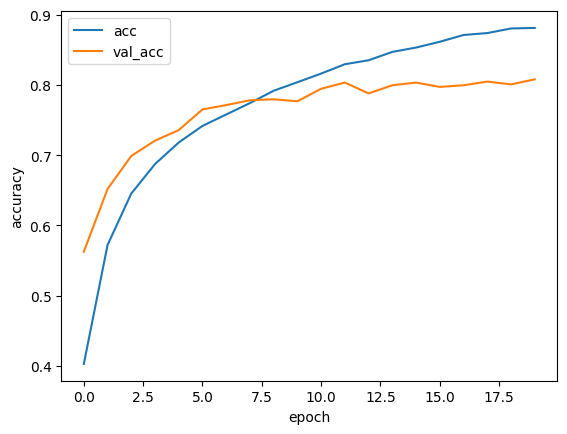

313/313 - 15s - loss: 0.6694 - acc: 0.7934 - 15s/epoch - 48ms/step


In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)